# Election Project

## Details:
* state. State in which poll was taken. 'U.S' is for national polls.
* startdate. Poll's start date.
* enddate. Poll's end date.
* pollster. Pollster conducting the poll.
* grade. Grade assigned by fivethirtyeight to pollster.
* samplesize. Sample size.
* population. Type of population being polled.
* rawpoll_clinton. Percentage for Hillary Clinton.
* rawpoll_trump. Percentage for Donald Trump
* rawpoll_johnson. Percentage for Gary Johnson
* rawpoll_mcmullin. Percentage for Evan McMullin.
* adjpoll_clinton. Fivethirtyeight adjusted percentage for Hillary Clinton.
* ajdpoll_trump. Fivethirtyeight adjusted percentage for Donald Trump
* adjpoll_johnson. Fivethirtyeight adjusted percentage for Gary Johnson
* adjpoll_mcmullin. Fivethirtyeight adjusted percentage for Evan McMullin.

In [5]:
#importing the necessary libraries for reading data
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Libraries for viisualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Library for reading contents from the web
import requests

from io import StringIO

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Uploading the data from the web
url = 'https://query.data.world/s/ywuan4fuhdl2yomxnshh3ttxkclfgq?dws=00000'

source = requests.get(url).text

poll_data = StringIO(source)

In [7]:
# Reading the data using pandas
poll_df = pd.read_csv(poll_data)
poll_df.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,45.65676,40.92004,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,46.84089,42.33184,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016


In [ ]:
# Checking for informations contained in the data
poll_df.info()

In [303]:
# Getting unique values for the type column
poll_df['type'].unique()

array(['polls-plus', 'now-cast', 'polls-only'], dtype=object)

In [304]:
# What was the statistical report of the data
poll_df.describe()

,cycle,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,poll_id,question_id
count,12624.0,12621.000000,12624.000000,12624.000000,12624.000000,8397.000000,90.000000,12624.000000,12624.000000,8397.000000,90.000000,12624.000000,12624.000000
mean,2016.0,1148.216068,0.255431,41.990860,39.828710,7.381740,24.004000,43.323005,42.667719,4.655091,24.511497,45910.899477,71591.326046
std,0.0,2630.647790,0.669326,7.727792,7.877327,2.959274,5.638641,7.095235,6.948256,2.472636,5.174286,2864.536271,4699.401001
min,2016.0,35.000000,0.000000,11.040000,4.000000,0.000000,9.000000,17.064950,4.372936,-3.677883,11.028320,35362.000000,47244.000000
25%,2016.0,447.000000,0.000358,38.000000,35.000000,5.400000,22.000000,40.210697,38.445588,3.136837,22.814548,45151.750000,69548.500000
50%,2016.0,772.000000,0.008172,43.000000,40.000000,7.000000,25.000000,44.148045,42.716265,4.375392,25.136030,46384.500000,72516.500000
75%,2016.0,1237.000000,0.086735,46.200000,45.000000,9.000000,28.000000,46.908830,46.313520,5.761469,28.067610,47741.250000,74724.250000
max,2016.0,84292.000000,8.720654,88.000000,68.000000,25.000000,31.000000,86.772180,72.437390,20.366840,31.583810,48922.000000,76636.000000


###### What to look out for !!!
    1.) What grade did each matchup have
    2.) Which poll type had the highest population
    3.) The grade for each poll type
    4.) What was the grade assigned to pollster
    5.) Performance of each candidate at various stages

<AxesSubplot:xlabel='grade', ylabel='count'>

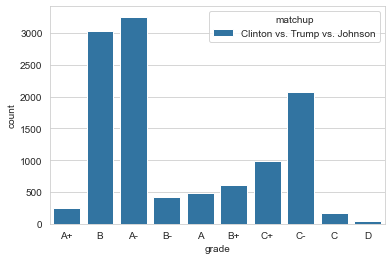

In [305]:
#  What grade did each matchup have
sns.countplot("grade", data=poll_df, hue="matchup")

<AxesSubplot:xlabel='population', ylabel='count'>

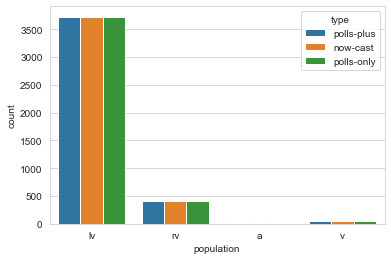

In [306]:
# Which poll type had the highest population
sns.countplot("population", data=poll_df, hue="type" )

<AxesSubplot:xlabel='grade', ylabel='count'>

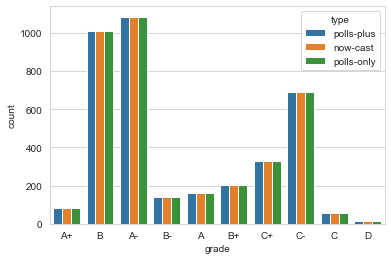

In [307]:
# The grade for each poll type
sns.countplot("grade", data=poll_df, hue="type")

<AxesSubplot:xlabel='grade', ylabel='count'>

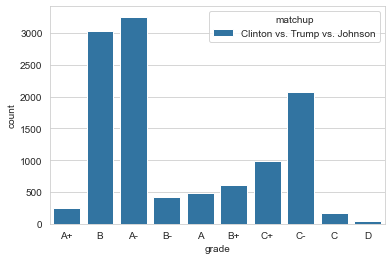

In [308]:
# matchup stat for each grade
sns.countplot("grade", data=poll_df, hue="matchup")

In [309]:
# Which candidate had the highest poll percent
poll_df['rawpoll'] =poll_df[["rawpoll_clinton","rawpoll_trump","rawpoll_johnson","rawpoll_mcmullin"]].max(axis=1)
rawpoll

0        47.00
1        38.03
2        42.00
3        45.00
4        47.00
         ...  
12619    37.00
12620    47.48
12621    50.00
12622    50.49
12623    46.00
Length: 12624, dtype: float64

In [310]:
# Which candidate had the highest Fivethirtyeight adjusted percentage
poll_df['adjpoll'] = poll_df[["adjpoll_clinton","adjpoll_trump","adjpoll_johnson","adjpoll_mcmullin"]].max(axis=1)
adjpoll

0        45.20163
1        43.34557
2        42.02638
3        45.65676
4        46.84089
           ...   
12619    43.04717
12620    46.54218
12621    53.83622
12622    49.57558
12623    46.40999
Length: 12624, dtype: float64

In [311]:
poll_df.head()

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp,rawpoll,adjpoll
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016,47.00,45.20163
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016,38.03,43.34557
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016,42.00,42.02638
3,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/4/2016,11/7/2016,YouGov,B,...,6.069454,NaN,NaN,https://d25d2506sfb94s.cloudfront.net/cumulus_...,48687,76262,11/7/16,09:35:33 8 Nov 2016,45.00,45.65676
4,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,Gravis Marketing,B-,...,3.726098,NaN,NaN,http://www.gravispolls.com/2016/11/final-natio...,48848,76444,11/7/16,09:35:33 8 Nov 2016,47.00,46.84089


[Text(0.5, 0, 'max_value Fivethirtyeight adjusted % '),
 Text(0, 0.5, 'max_value for Candidate %'),
 Text(0.5, 1.0, 'adjpoll Vs rawpoll')]

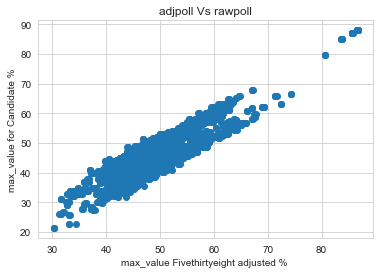

In [312]:
fig, ax = plt.subplots()
ax.scatter(poll_df['adjpoll'], poll_df['rawpoll'])
ax.set(xlabel= "max_value Fivethirtyeight adjusted % ", ylabel="max_value for Candidate %", title="adjpoll Vs rawpoll")

<AxesSubplot:xlabel='adjpoll'>

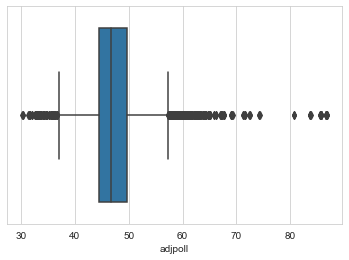

In [315]:
sns.boxplot('adjpoll', data=poll_df)

<AxesSubplot:xlabel='rawpoll'>

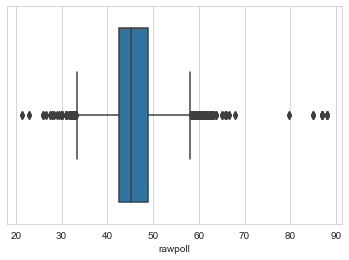

In [316]:
sns.boxplot('rawpoll', data=poll_df)

In [320]:
poll_df["state"].value_counts()

U.S.                    3318
Florida                  444
North Carolina           375
Pennsylvania             375
Ohio                     345
New Hampshire            336
Nevada                   279
Virginia                 273
Michigan                 258
Wisconsin                240
Georgia                  240
Colorado                 240
Arizona                  237
California               213
Iowa                     210
Missouri                 204
Utah                     198
New York                 189
Illinois                 180
Texas                    174
Indiana                  168
New Jersey               162
Oregon                   162
Maine                    159
South Carolina           156
Washington               153
Massachusetts            153
New Mexico               153
Kansas                   153
Louisiana                150
Kentucky                 147
Idaho                    144
Minnesota                144
Maryland                 141
West Virginia 

In [350]:
std = DataFrame(poll_df.std())
std

,0
cycle,2.273827e-13
samplesize,2.630648e+03
poll_wt,6.693257e-01
rawpoll_clinton,7.727792e+00
rawpoll_trump,7.877327e+00
rawpoll_johnson,2.959274e+00
rawpoll_mcmullin,5.638641e+00
adjpoll_clinton,7.095235e+00
adjpoll_trump,6.948256e+00
adjpoll_johnson,2.472636e+00


In [1]:
fig, ax = plt.subplots()
ax.scatter(poll_df['state'], poll_df['rawpoll'])
ax.set(xlabel= "max_value Fivethirtyeight adjusted % ", ylabel="max_value for Candidate %", title="adjpoll Vs rawpoll")

NameError: name 'plt' is not defined

In [351]:
mean = DataFrame(poll_df.mean())
mean

,0
cycle,2016.000000
samplesize,1148.216068
poll_wt,0.255431
rawpoll_clinton,41.990860
rawpoll_trump,39.828710
rawpoll_johnson,7.381740
rawpoll_mcmullin,24.004000
adjpoll_clinton,43.323005
adjpoll_trump,42.667719
adjpoll_johnson,4.655091


## Vote data set

    1.) Which state has the highest vote
    2.) Total vote for each country
    3.) Country with the highest vote count
    4.) Country that gave the winner the highest vote
    5.) which party dominated
    6.) Which country did each candidate get more vote from

In [122]:
address = "https://query.data.world/s/zfbg3shwtemsc4drmdwjbz5hr2e4zm?dws=00000"

link = requests.get(address).text

vote_data = StringIO(link)

vote_df = pd.read_csv(vote_data)
vote_df.head()
    
    

,ï»¿StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,AK,alaska,2000,Alaska,246588,GOP,Trump,130415.0
1,AL,alabama,1087,Macon,8748,GOP,Trump,1394.0
2,AL,alabama,1131,Wilcox,6095,GOP,Trump,1737.0
3,AL,alabama,1037,Coosa,5223,GOP,Trump,3376.0
4,AL,alabama,1009,Blount,25384,GOP,Trump,22808.0


In [123]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15565 entries, 0 to 15564
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ï»¿StateCode     15565 non-null  object 
 1   StateName        15565 non-null  object 
 2   CountyFips       15565 non-null  int64  
 3   CountyName       15565 non-null  object 
 4   CountyTotalVote  15565 non-null  int64  
 5   Party            15565 non-null  object 
 6   Candidate        15565 non-null  object 
 7   VoteCount        13227 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 972.9+ KB


In [133]:
valid_vote = vote_df.dropna()

In [134]:
valid_vote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13227 entries, 0 to 15564
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ï»¿StateCode     13227 non-null  object 
 1   StateName        13227 non-null  object 
 2   CountyFips       13227 non-null  int64  
 3   CountyName       13227 non-null  object 
 4   CountyTotalVote  13227 non-null  int64  
 5   Party            13227 non-null  object 
 6   Candidate        13227 non-null  object 
 7   VoteCount        13227 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 930.0+ KB


In [136]:
vote_df.Party.value_counts()

GOP    3113
DEM    3113
GRN    3113
LIB    3113
CST    3113
Name: Party, dtype: int64

<AxesSubplot:xlabel='Party', ylabel='count'>

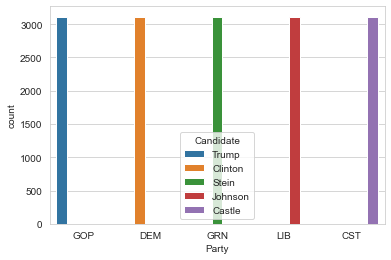

In [224]:
sns.countplot("Party", data=vote_df, hue="Candidate")

In [141]:
# State with the highest vote
valid_vote["StateName"].max()

'wyoming'

In [143]:
# country with the highest vote
valid_vote["CountyName"].max()

'Ziebach'

In [127]:
don_mean = vote_df['VoteCount'].mean()
don_std = vote_df['VoteCount'].std()

print("The average vote casted was %.2f with a std of %.2f" %(don_mean, don_std))

The average vote casted was 9456.42 with a std of 38625.83


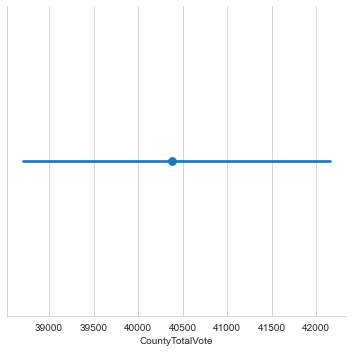

In [186]:
# Which state had the highest Candidate?
sns.factorplot("CountyTotalVote", data=vote_df)

In [187]:
vote_df["CountyTotalVote"].describe()

count    1.556500e+04
mean     4.038202e+04
std      1.059828e+05
min      6.400000e+01
25%      4.807000e+03
50%      1.091200e+04
75%      2.860000e+04
max      2.240323e+06
Name: CountyTotalVote, dtype: float64